# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ZEN_norm_test.zone_norm import ZoneNorm

# Supplementary Figures

## Run ZEN up to Distribution Fitting Step

Before creating the plots, ZoneNorm must be run for each dataset. Note that this can take quite a long time to run them all.

In [5]:
n_cores = 12
test_distributions = ZoneNorm.scipy_distributions.keys()

# Fit distributions for erythroid ATAC-seq
ery_atac_znorm = ZoneNorm(analysis_name = "Erythroid_ATAC",
                          bigwig_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Erythroid/50_Donors_Erythroid/hg38/Unpublished/ATAC/Replicates/Raw/",
                          test_distributions = test_distributions,
                          n_cores = n_cores,
                          norm_method = "ZEN")
ery_atac_znorm.readBigWigSignals()
ery_atac_znorm.testDistributions()

# Fit distributions for erythroid RAD21 ChIP-seq
rad21_chip_znorm = ZoneNorm(analysis_name = "Erythroid_RAD21_ChIPseq",
                            bigwig_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Erythroid/50_Donors_Erythroid/hg38/E_Georgiades_2025/RAD21/Raw",
                            test_distributions = test_distributions,
                            n_cores = n_cores,
                            norm_method = "ZEN")
rad21_chip_znorm.readBigWigSignals()
rad21_chip_znorm.testDistributions()


# Fit distributions for reverse strand HeLa TT-seq
hela_ttseq_znorm = ZoneNorm(analysis_name = "HeLa_TTseq",
                            bigwig_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Cervical_Carcinoma/HeLa_TT-seq_A_Fiszbein_2024/hg38/TT-seq_Raw",
                            test_distributions = test_distributions,
                            n_cores = n_cores,
                            norm_method = "ZEN")
hela_ttseq_znorm.readBigWigSignals()
hela_ttseq_znorm.testDistributions()

# Fit distributions for reverse strand A-375 CDK13 mutant TT-seq
a375_ttseq_znorm = ZoneNorm(analysis_name = "A375_TTseq",
                            bigwig_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Melanoma/A-375ML_Insco_2023/hg38/TTseq_Raw",
                            test_distributions = test_distributions,
                            n_cores = n_cores,
                            norm_method = "ZEN")
a375_ttseq_znorm.readBigWigSignals()
a375_ttseq_znorm.testDistributions()

# Fit distributions for CATlas scATAC-seq
catlas_atac_znorm = ZoneNorm(analysis_name = "CATlas_scATAC", 
                             bigwig_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/CATlas/hg38/scATAC_Reverse_Normalised",
                             test_distributions = test_distributions,
                             n_cores = n_cores,
                             norm_method = "ZEN")
catlas_atac_znorm.readBigWigSignals()
catlas_atac_znorm.testDistributions()

Opening 14 bigWig files
Setting chromosomes as autosomal and sex chromosomes
Signal, smoothed signal and missing signal already created for chromosomes
Distribution statistics already calculated for chromosomes
Opening 8 bigWig files
Setting chromosomes as autosomal and sex chromosomes
Reading chr1:0-248956422 for Don030_RAD21_d13_rep3 (8/8)
Reading chr21:0-46709983 for Don001_RAD21_d13_rep1 (1/8)Reading chr1:0-248956422 for Don030_RAD21_d13_rep1 (7/8)Reading chr21:0-46709983 for Don001_RAD21_d13_rep2 (2/8)

Reading chr1:0-248956422 for Don002_RAD21_d13_rep3 (6/8)Reading chr1:0-248956422 for Don002_RAD21_d13_rep2 (5/8)Reading chr21:0-46709983 for Don001_RAD21_d13_rep3 (3/8)



Reading chr21:0-46709983 for Don002_RAD21_d13_rep1 (4/8)Reading chr21:0-46709983 for Don002_RAD21_d13_rep2 (5/8)Reading chr1:0-248956422 for Don002_RAD21_d13_rep1 (4/8)

Reading chr1:0-248956422 for Don001_RAD21_d13_rep3 (3/8)
Reading chr21:0-46709983 for Don002_RAD21_d13_rep3 (6/8)

Smoothing chr21 signal for Do

## QQ Plots

Create quantile-quantile plots per dataset for specific samples

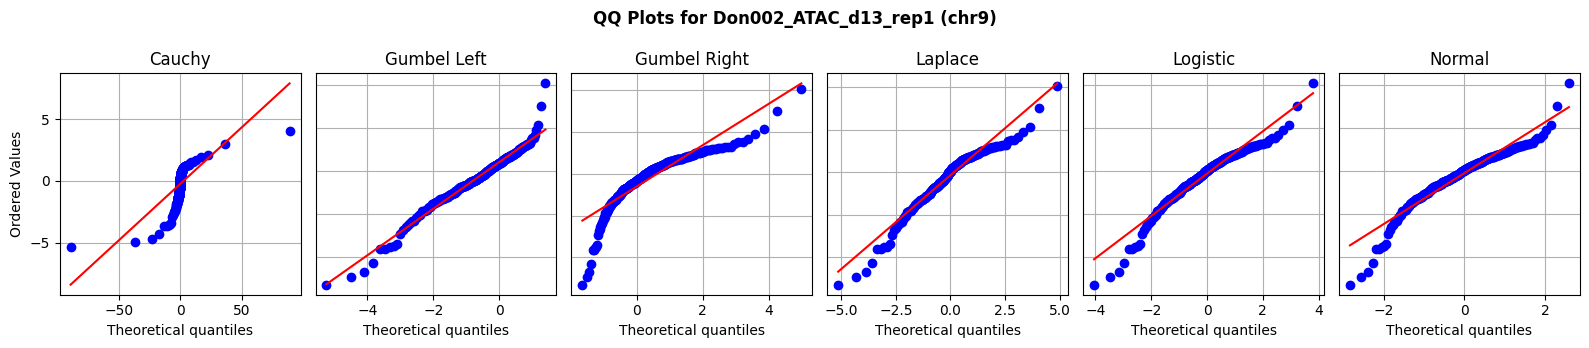

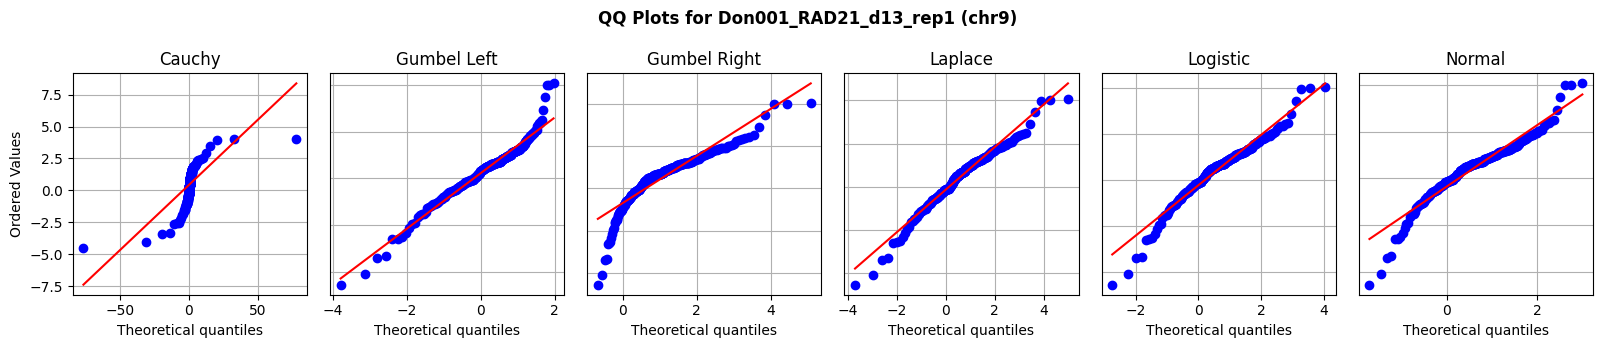

In [ ]:
chromosome = "chr9"
qq_samples = {"Don002_ATAC_d13_rep1": ery_atac_znorm,
              "Don001_RAD21_d13_rep1": rad21_chip_znorm,
              "HeLa_TTseq_Control_Rep1_Neg": hela_ttseq_znorm}

for sample_name, znorm in qq_samples.items():
    # Create QQ-plots per sample
    znorm.plotQQPlot(plot_sample = sample_name,
                     chromosome = chromosome,
                     param_type = "median_fit",
                     plot_width = 16,
                     plot_height = 3.5,
                     title = f"QQ Plots for {sample_name} ({chromosome})",
                     pdf_name = f"{sample_name}_QQ_Plots")

## Distribution Fit Plots

Create histrograms of signal and plot the distributions to show how well they fit

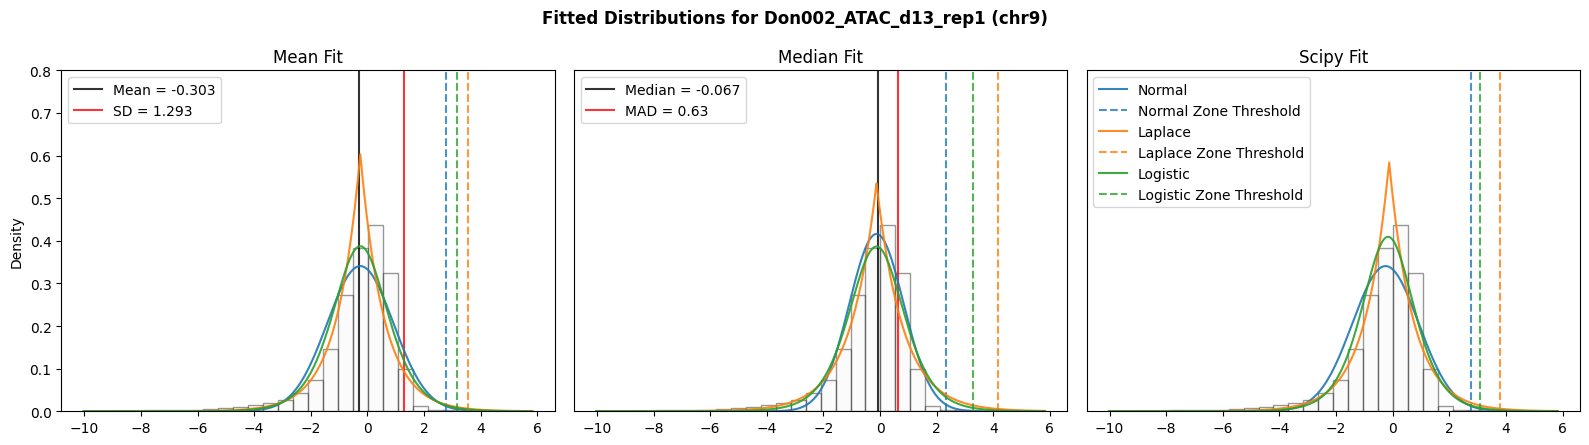

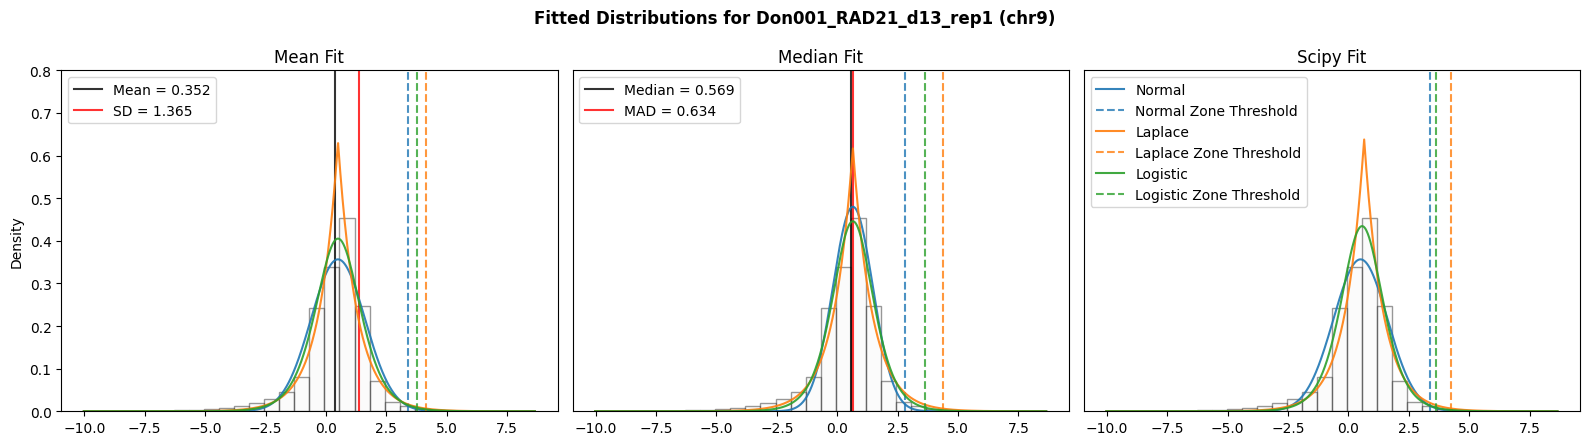

In [ ]:
sample_dists = {"Don002_ATAC_d13_rep1": [ery_atac_znorm, ["normal", "laplace", "logistic"]],
                "Don001_RAD21_d13_rep1": [rad21_chip_znorm, ["normal", "laplace", "logistic"]],
                "HeLa_TTseq_Control_Rep1_Neg": [hela_ttseq_znorm, ["normal", "gumbel_l", "gumbel_r"]],
                "A375_TTseq_CDK13_R860Q_Rep1_Neg": [a375_ttseq_znorm, ["normal", "laplace", "logistic"]]}

for sample_name, attributes in sample_dists.items():
    znorm = attributes[0]
    dists = attributes[1]
    # Create distribution plots per sample
    znorm.plotDistributionFit(plot_sample = sample_name,
                              chromosome = chromosome,
                              plot_distributions = dists,
                              plot_param_types = ["mean_fit", "median_fit", "scipy_fit"],
                              plot_zone_threshold = True,
                              zone_probability = 0.995,
                              y_limits = [0, 0.8],
                              plot_width = 16,
                              plot_height = 4.5,
                              title = f"Fitted Distributions for {sample_name} ({chromosome})",
                              pdf_name = f"{sample_name}_Distributions_{chromosome}")

## Kolmogorov-Smirnov Test Boxplots

Create Kolmogorov-Smirnov box plots per assay type

In [ ]:
# Set box colours
colour_palette = ["#419BE6", "#FF8800", "#52C942"]

def KSBoxplot(results_df, colour_palette, output_pdf):
    """ Create boxplot of Kolmogorov-Smirnov test statistic of distribution goodness-of-fit """
    
    # Create boxplot
    plt.figure(figsize = (7, 7))
    sns.boxplot(data = results_df.sort_values(by = ["distribution", "fit"], ascending = [True, False]), 
                x = "distribution", y = "value", hue = "fit", palette = sns.color_palette(colour_palette, len(colour_palette)))

    plt.title("KS Statistic per Distribution Across ATAC-seq Datasets", fontweight = "bold", fontsize = 14)
    plt.xlabel("Distribution", fontsize = 15)
    plt.ylabel(r"KS Stat ($D_\delta$)", fontsize = 15)
    plt.xticks(rotation = 45, fontsize = 14)
    plt.yticks(fontsize = 14)
    sns.despine(top = True, right = True, left = False, bottom = False)
    plt.legend(title = "", bbox_to_anchor = (1, 1), loc = "upper right", title_fontsize = 14, fontsize = 14, frameon = False)
    plt.tight_layout()

    plt.savefig(output_pdf, format = "pdf", bbox_inches = "tight")

    # Show the plot
    plt.show()

ATAC-seq KS boxplot

In [ ]:
atac_znorms = [ery_atac_znorm, catlas_atac_znorm]
chipseq_znorms = [rad21_chip_znorm]
ttseq_znorms = [hela_ttseq_znorm, a375_ttseq_znorm]


getSignalStats(stats_type = "distribution")

In [ ]:
atac_ks = [
    ("Erythroid ATAC-seq", "Normal", "SciPy", 0.11807468615623457),
    ("Erythroid ATAC-seq", "Normal", "Mean", 0.11807468623516401),
    ("Erythroid ATAC-seq", "Normal", "Median", 0.0822783043564374),
    ("Erythroid ATAC-seq", "Cauchy", "SciPy", 0.10558122510265508),
    ("Erythroid ATAC-seq", "Cauchy", "Mean", 0.1891511322881233),
    ("Erythroid ATAC-seq", "Cauchy", "Median", 0.10892376709654),
    ("Erythroid ATAC-seq", "Gumbel Left", "SciPy", 0.08771281850587992),
    ("Erythroid ATAC-seq", "Gumbel Left", "Mean", 0.2429561546704295),
    ("Erythroid ATAC-seq", "Gumbel Left", "Median", 0.15198036297126877),
    ("Erythroid ATAC-seq", "Laplace", "SciPy", 0.08585530809582652),
    ("Erythroid ATAC-seq", "Laplace", "Mean", 0.1292474542965076),
    ("Erythroid ATAC-seq", "Laplace", "Median", 0.0873054113822485),
    ("Erythroid ATAC-seq", "Gumbel Right", "SciPy", 0.22852270922718163),
    ("Erythroid ATAC-seq", "Gumbel Right", "Mean", 0.17390224131152088),
    ("Erythroid ATAC-seq", "Gumbel Right", "Median", 0.18896813752566194),
    ("Erythroid ATAC-seq", "Logistic", "SciPy", 0.07388484626662187),
    ("Erythroid ATAC-seq", "Logistic", "Mean", 0.11133149380015765),
    ("Erythroid ATAC-seq", "Logistic", "Median", 0.08828775339274664),
    
    ("H1 Brain ATAC-seq", "Cauchy", "SciPy", 0.07670707582167643),
    ("H1 Brain ATAC-seq", "Cauchy", "Mean", 0.16376421092336224),
    ("H1 Brain ATAC-seq", "Cauchy", "Median", 0.08305823319943545),
    ("H1 Brain ATAC-seq", "Gumbel Left", "SciPy", 0.10355540665027814),
    ("H1 Brain ATAC-seq", "Gumbel Left", "Mean", 0.2005303469270363),
    ("H1 Brain ATAC-seq", "Gumbel Left", "Median", 0.154822953348857),
    ("H1 Brain ATAC-seq", "Gumbel Right", "SciPy", 0.18718390948238692),
    ("H1 Brain ATAC-seq", "Gumbel Right", "Mean", 0.16026871316431673),
    ("H1 Brain ATAC-seq", "Gumbel Right", "Median", 0.17004520520409008),
    ("H1 Brain ATAC-seq", "Laplace", "SciPy", 0.05721910279049685),
    ("H1 Brain ATAC-seq", "Laplace", "Mean", 0.08103215427864195),
    ("H1 Brain ATAC-seq", "Laplace", "Median", 0.06004146080178067),
    ("H1 Brain ATAC-seq", "Normal", "SciPy", 0.08630427170475785),
    ("H1 Brain ATAC-seq", "Normal", "Mean", 0.08630427191103039),
    ("H1 Brain ATAC-seq", "Normal", "Median", 0.056968301417489126),
    ("H1 Brain ATAC-seq", "Logistic", "SciPy", 0.050296442323207895),
    ("H1 Brain ATAC-seq", "Logistic", "Mean", 0.07301022040108135),
    ("H1 Brain ATAC-seq", "Logistic", "Median", 0.0623471562143958),

    ("CATlas ATAC-seq", "Gumbel Right", "SciPy", 0.2244125988682473),
    ("CATlas ATAC-seq", "Gumbel Right", "Mean", 0.1956053015635245),
    ("CATlas ATAC-seq", "Gumbel Right", "Median", 0.1734032516504197),
    ("CATlas ATAC-seq", "Logistic", "SciPy", 0.08647861794589247),
    ("CATlas ATAC-seq", "Logistic", "Mean", 0.1362095112930747),
    ("CATlas ATAC-seq", "Logistic", "Median", 0.07272763490365947),
    ("CATlas ATAC-seq", "Laplace", "SciPy", 0.07229555392501212),
    ("CATlas ATAC-seq", "Laplace", "Mean", 0.11907848030202951),
    ("CATlas ATAC-seq", "Laplace", "Median", 0.06400767463705763),
    ("CATlas ATAC-seq", "Normal", "SciPy", 0.14868449447481458),
    ("CATlas ATAC-seq", "Normal", "Mean", 0.1486844943856245),
    ("CATlas ATAC-seq", "Normal", "Median", 0.08584244187867077),
    ("CATlas ATAC-seq", "Gumbel Left", "SciPy", 0.13802498307049893),
    ("CATlas ATAC-seq", "Gumbel Left", "Mean", 0.26166032624855634),
    ("CATlas ATAC-seq", "Gumbel Left", "Median", 0.1660434886827364),
    ("CATlas ATAC-seq", "Cauchy", "SciPy", 0.07254302777428345),
    ("CATlas ATAC-seq", "Cauchy", "Mean", 0.18916464739261896),
    ("CATlas ATAC-seq", "Cauchy", "Median", 0.07337856107708682),
]

atac_ks_df = pd.DataFrame(atac_ks, columns = ["dataset", "distribution", "fit", "value"])
KSBoxplot(results_df = atac_ks_df, colour_palette = colour_palette, output_pdf = "ks_boxplot_atac.pdf")

: 

ChIP-seq KS boxplot

In [ ]:
chipseq_ks = [
    ("Erythroid RAD21 ChIP-seq", "Gumbel Left", "SciPy", 0.08326575164013421),
    ("Erythroid RAD21 ChIP-seq", "Gumbel Left", "Mean", 0.25501847728814425),
    ("Erythroid RAD21 ChIP-seq", "Gumbel Left", "Median", 0.15538529452784255),
    ("Erythroid RAD21 ChIP-seq", "Laplace", "SciPy", 0.0822137283022809),
    ("Erythroid RAD21 ChIP-seq", "Laplace", "Mean", 0.13085886843721525),
    ("Erythroid RAD21 ChIP-seq", "Laplace", "Median", 0.07943097677708578),
    ("Erythroid RAD21 ChIP-seq", "Logistic", "SciPy", 0.07504079683935659),
    ("Erythroid RAD21 ChIP-seq", "Logistic", "Mean", 0.12770364992391522),
    ("Erythroid RAD21 ChIP-seq", "Logistic", "Median", 0.07938833520934506),
    ("Erythroid RAD21 ChIP-seq", "Gumbel Right", "SciPy", 0.24049095196645898),
    ("Erythroid RAD21 ChIP-seq", "Gumbel Right", "Mean", 0.1761644785644518),
    ("Erythroid RAD21 ChIP-seq", "Gumbel Right", "Median", 0.17864133751805142),
    ("Erythroid RAD21 ChIP-seq", "Normal", "SciPy", 0.13639212504142284),
    ("Erythroid RAD21 ChIP-seq", "Normal", "Mean", 0.13639212497991995),
    ("Erythroid RAD21 ChIP-seq", "Normal", "Median", 0.08344085638101155),
    ("Erythroid RAD21 ChIP-seq", "Cauchy", "SciPy", 0.10011374158152458),
    ("Erythroid RAD21 ChIP-seq", "Cauchy", "Mean", 0.19094956500393478),
    ("Erythroid RAD21 ChIP-seq", "Cauchy", "Median", 0.10343122233290146),
    
    ("Erythroid CTCF ChIP-seq", "Logistic", "SciPy", 0.06329179013353732),
    ("Erythroid CTCF ChIP-seq", "Logistic", "Mean", 0.09844728096399807),
    ("Erythroid CTCF ChIP-seq", "Logistic", "Median", 0.07421355962626763),
    ("Erythroid CTCF ChIP-seq", "Cauchy", "SciPy", 0.09615095324988325),
    ("Erythroid CTCF ChIP-seq", "Cauchy", "Mean", 0.18391752315758444),
    ("Erythroid CTCF ChIP-seq", "Cauchy", "Median", 0.10068348230120275),
    ("Erythroid CTCF ChIP-seq", "Gumbel Left", "SciPy", 0.09817476794286589),
    ("Erythroid CTCF ChIP-seq", "Gumbel Left", "Mean", 0.22815494994234634),
    ("Erythroid CTCF ChIP-seq", "Gumbel Left", "Median", 0.15202626718075432),
    ("Erythroid CTCF ChIP-seq", "Gumbel Right", "SciPy", 0.23105824776608552),
    ("Erythroid CTCF ChIP-seq", "Gumbel Right", "Mean", 0.17010507827687887),
    ("Erythroid CTCF ChIP-seq", "Gumbel Right", "Median", 0.17523512333774188),
    ("Erythroid CTCF ChIP-seq", "Normal", "SciPy", 0.10757796445124465),
    ("Erythroid CTCF ChIP-seq", "Normal", "Mean", 0.10757796437954528),
    ("Erythroid CTCF ChIP-seq", "Normal", "Median", 0.06779372609038513),
    ("Erythroid CTCF ChIP-seq", "Laplace", "SciPy", 0.07181918882604624),
    ("Erythroid CTCF ChIP-seq", "Laplace", "Mean", 0.11005002149030178),
    ("Erythroid CTCF ChIP-seq", "Laplace", "Median", 0.075067012818687),

    ("HEL Pol II ChIP-seq", "Gumbel Right", "SciPy", 0.22700190941085463),
    ("HEL Pol II ChIP-seq", "Gumbel Right", "Mean", 0.16878283196517632),
    ("HEL Pol II ChIP-seq", "Gumbel Right", "Median", 0.17024097672477081),
    ("HEL Pol II ChIP-seq", "Laplace", "SciPy", 0.06557968068275939),
    ("HEL Pol II ChIP-seq", "Laplace", "Mean", 0.1162188509512868),
    ("HEL Pol II ChIP-seq", "Laplace", "Median", 0.06412643607913765),
    ("HEL Pol II ChIP-seq", "Normal", "SciPy", 0.1372772355928485),
    ("HEL Pol II ChIP-seq", "Normal", "Mean", 0.13727723604439745),
    ("HEL Pol II ChIP-seq", "Normal", "Median", 0.07968450416669032),
    ("HEL Pol II ChIP-seq", "Gumbel Left", "SciPy", 0.08929866772787116),
    ("HEL Pol II ChIP-seq", "Gumbel Left", "Mean", 0.2536833927624862),
    ("HEL Pol II ChIP-seq", "Gumbel Left", "Median", 0.16399017209029773),
    ("HEL Pol II ChIP-seq", "Cauchy", "SciPy", 0.08399506719459526),
    ("HEL Pol II ChIP-seq", "Cauchy", "Mean", 0.18237031904933282),
    ("HEL Pol II ChIP-seq", "Cauchy", "Median", 0.08637079749347581),
    ("HEL Pol II ChIP-seq", "Logistic", "SciPy", 0.07013981348586011),
    ("HEL Pol II ChIP-seq", "Logistic", "Mean", 0.12528456069155824),
    ("HEL Pol II ChIP-seq", "Logistic", "Median", 0.06862188311634362)
]

chipseq_ks_df = pd.DataFrame(chipseq_ks, columns = ["dataset", "distribution", "fit", "value"])
KSBoxplot(results_df = chipseq_ks_df, colour_palette = colour_palette, output_pdf = "ks_boxplot_chipseq.pdf")

TT-seq KS boxplot

In [ ]:
ttseq_ks = [
    ("HeLa TT-seq", "Laplace", "SciPy", 0.094700430153397),
    ("HeLa TT-seq", "Laplace", "Mean", 0.12996904840081575),
    ("HeLa TT-seq", "Laplace", "Median", 0.10370660497682604),
    ("HeLa TT-seq", "Gumbel Left", "SciPy", 0.06723456115295103),
    ("HeLa TT-seq", "Gumbel Left", "Mean", 0.22752072410562935),
    ("HeLa TT-seq", "Gumbel Left", "Median", 0.17118438922107077),
    ("HeLa TT-seq", "Gumbel Right", "SciPy", 0.14132755648241788),
    ("HeLa TT-seq", "Gumbel Right", "Mean", 0.16769181201899508),
    ("HeLa TT-seq", "Gumbel Right", "Median", 0.18526708658354935),
    ("HeLa TT-seq", "Cauchy", "SciPy", 0.11884650621954686),
    ("HeLa TT-seq", "Cauchy", "Mean", 0.16717428731882966),
    ("HeLa TT-seq", "Cauchy", "Median", 0.12686419249752395),
    ("HeLa TT-seq", "Normal", "SciPy", 0.07519426135953587),
    ("HeLa TT-seq", "Normal", "Mean", 0.07519426107007206),
    ("HeLa TT-seq", "Normal", "Median", 0.07713629455715336),
    ("HeLa TT-seq", "Logistic", "SciPy", 0.06638590242066017),
    ("HeLa TT-seq", "Logistic", "Mean", 0.09138128094498167),
    ("HeLa TT-seq", "Logistic", "Median", 0.1021583347258197),

    ("A375ML TT-seq", "Cauchy", "SciPy", 0.07420359868135804),
    ("A375ML TT-seq", "Cauchy", "Mean", 0.17343125239433724),
    ("A375ML TT-seq", "Cauchy", "Median", 0.0838444449758049),
    ("A375ML TT-seq", "Normal", "SciPy", 0.09945501415690192),
    ("A375ML TT-seq", "Normal", "Mean", 0.09945501331625074),
    ("A375ML TT-seq", "Normal", "Median", 0.054383715488834077),
    ("A375ML TT-seq", "Logistic", "SciPy", 0.05342021503481066),
    ("A375ML TT-seq", "Logistic", "Mean", 0.08225870045090306),
    ("A375ML TT-seq", "Logistic", "Median", 0.06579387956793475),
    ("A375ML TT-seq", "Gumbel Right", "SciPy", 0.19194297192340873),
    ("A375ML TT-seq", "Gumbel Right", "Mean", 0.16769218497878244),
    ("A375ML TT-seq", "Gumbel Right", "Median", 0.1624300244865863),
    ("A375ML TT-seq", "Laplace", "SciPy", 0.06014452187513809),
    ("A375ML TT-seq", "Laplace", "Mean", 0.07820412907250945),
    ("A375ML TT-seq", "Laplace", "Median", 0.06187660788920632),
    ("A375ML TT-seq", "Gumbel Left", "SciPy", 0.12084037925530995),
    ("A375ML TT-seq", "Gumbel Left", "Mean", 0.20102443583783083),
    ("A375ML TT-seq", "Gumbel Left", "Median", 0.16864791103143656),

    ("HEK293T TT-seq", "Cauchy", "SciPy", 0.10988522590943885),
    ("HEK293T TT-seq", "Cauchy", "Mean", 0.16248428861135225),
    ("HEK293T TT-seq", "Cauchy", "Median", 0.12300929977209181),
    ("HEK293T TT-seq", "Normal", "SciPy", 0.06972474656327624),
    ("HEK293T TT-seq", "Normal", "Mean", 0.06972474670178937),
    ("HEK293T TT-seq", "Normal", "Median", 0.08617768868731057),
    ("HEK293T TT-seq", "Logistic", "SciPy", 0.07396908971261701),
    ("HEK293T TT-seq", "Logistic", "Mean", 0.08606534788624864),
    ("HEK293T TT-seq", "Logistic", "Median", 0.11021272417266237),
    ("HEK293T TT-seq", "Gumbel Right", "SciPy", 0.12214799693922583),
    ("HEK293T TT-seq", "Gumbel Right", "Mean", 0.209833527056712),
    ("HEK293T TT-seq", "Gumbel Right", "Median", 0.1636789901956527),
    ("HEK293T TT-seq", "Laplace", "SciPy", 0.10071123078545575),
    ("HEK293T TT-seq", "Laplace", "Mean", 0.11958729436778283),
    ("HEK293T TT-seq", "Laplace", "Median", 0.10737834158782306),
    ("HEK293T TT-seq", "Gumbel Left", "SciPy", 0.10141275283413738),
    ("HEK293T TT-seq", "Gumbel Left", "Mean", 0.21077176641722514),
    ("HEK293T TT-seq", "Gumbel Left", "Median", 0.19879717558028207),
]

ttseq_ks_df = pd.DataFrame(ttseq_ks, columns = ["dataset", "distribution", "fit", "value"])
KSBoxplot(results_df = ttseq_ks_df, colour_palette = colour_palette, output_pdf = "ks_boxplot_ttseq.pdf")